<center>

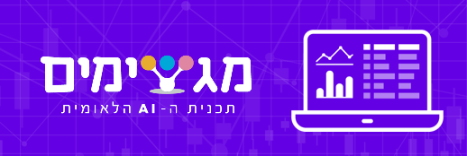

<div align="center" dir="rtl"><font color="#7E30E1" size="18"><b>
   שבוע 22 - תרגול כיתה
  </b>
 </font>
 <br/>
 <br/>
</div>


<div align="center" dir="rtl">
 <div align="center" dir="rtl">
  <font color="Grey">
   <ul style="direction: rtl; text-align: right; list-style-position: inside;">
    <li>
     צרו עותק של המחברת
    </li>
    <li>
     שנו את שם העותק לשמכם הפרטי, ועבדו עם עותק זה
    </li>
   </ul>
   <br/>
   בהצלחה!
  </font>
 </div>
</div>


<div align="center" dir="rtl">
 <hr color="#7E30E1" style="border: none; border-top: 2px solid; margin: 0;"/>
 <hr color="#7E30E1" style="border: none; border-top: 2px solid; margin: 0;"/>
 <div align="center" dir="rtl">
  <font color="#7E30E1" size="6">
   <b>
 KNN <br>
 מתחת למכסה המנוע 🔌
   </b>
  </font>
  <div align="center" dir="rtl">
   <hr color="#7E30E1" style="border: none; border-top: 2px solid; margin: 0;"/>
   <hr color="#7E30E1" style="border: none; border-top: 2px solid; margin: 0;"/>
  </div>
 </div>
</div>


<div dir=rtl><font size='4'>
לפני הכל, נטען את סט הנתונים הבא - נתוני פוקימונים!


In [14]:
import pandas as pd
import math
import seaborn as sns
sns.set_style("whitegrid")

pd.options.mode.chained_assignment = None

def read_csv_from_googledrive(url):
  if(url.startswith("https://drive.google.com/uc?id=")):
    return pd.read_csv(url)
  url='https://drive.google.com/uc?id=' + url.split('/')[-2]
  df=pd.read_csv(url)
  return df

df = read_csv_from_googledrive("https://drive.google.com/uc?id=11hAlIr-BOFG0DSJS4vDp-fQ_kAwdfBP1")
df.drop('#', axis=1, inplace=True)
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


<div dir="rtl"><font size=4>

**סעיף 1**

 בנו פונקציה בשם euclidean_distance המקבלת 2 סדרות נתונים A ו-B ומחזירה את השורשת של סכום ההפרשים של האיברים שלהם בריבוע כמו שראינו בכיתה. <br>
גשו לביצוע הפונקציה ב2 שלבים:
<br>
*  חשבו את הסכום שבתוך השורש בנוסחא שראינו בשיעור.<br> רמז: היעזרו בלולאה
*  חשבו את שורש הסכום שהתקבל. <br>רמז: השתמשו בפונקציה <a href="https://www.w3schools.com/python/ref_math_sqrt.asp">SQRT</a>.

In [15]:
#השלימו כאן קטע קוד
#------------
def euclidean_distance(A,B):
    sum = 0.0
    for i in range(len(A)):
        sum += (B[i] - A[i]) ** 2

    distance = math.sqrt(sum)
    return distance
#------------

<div dir=rtl>

**סעיף 2**

בדקו את הפונקציה שבניתם- הפעילו אותה על הפיצ'רים ['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'] עבור הפוקימונים Bulbasaur ו-Pikachu.

 שאלה למחשבה 🤔<br>
מה המרחק שהתקבל?

In [16]:
A=df[df['Name']=='Pikachu'][['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].iloc[0]
B=df[df['Name']=='Bulbasaur'][['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].iloc[0]

# השלימו כאן קטע קוד - הוסיפו מימוש לפונקציה
#------------
distance=euclidean_distance(A,B)
distance
#------------

<ipython-input-15-a027243268a8>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum += (B[i] - A[i]) ** 2


50.91168824543142

<div dir="rtl">

**סעיף 3**

המנהלים בעולם הפוקימונים הגיעו להחלטה - יש להוסיף לכל מתקפה (attack) את מספר הדור שלו. <br> הגדירו פונקציית lambda המשתמשת במתודות assing או apply. הפעילו את הפונקציה על העמודות הרלוונטיות וקראו ל-df החדש new_df.

In [17]:
#השלימו כאן קטע קוד
#------------
new_df = df.assign(Attack=lambda x: x['Attack'] + x['Generation'])
#------------

<div dir="rtl">

הריצו ובדקו את תקינות הפונקציה.

In [18]:
new_df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,50,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,63,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,83,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,101,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,53,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,106,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,166,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,116,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,166,60,170,130,80,6,True


<div dir=rtl>

**סעיף 3**

כעת חזרו על סעיף חישוב המרחק עבור שני הפוקימונים עם הערך החדש של attack שחישבתם.

 שאלה למחשבה 🤔<br>
האם המרחק השתנה? מה הסיבה לכך?


In [19]:
A=df[df['Name']=='Pikachu'][['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].iloc[0]
B=df[df['Name']=='Bulbasaur'][['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].iloc[0]

#הוסיפו כאן שימוש בפונקציה
#------------
distance=euclidean_distance(A,B)
distance
#------------

<ipython-input-15-a027243268a8>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum += (B[i] - A[i]) ** 2


50.91168824543142

<div dir="rtl">

**סעיף 4**

צרו פונקציה הנקראת most_common_value, המקבלת משתנה מסוג Series ומחזירה את הערך השכיח.

In [20]:
#השלימו כאן קטע קוד
#------------
def most_common_value(series:pd.Series):
    return series.mode().item()

#------------

<div dir='rtl' align='right'><font size='4'>

**סעיף 5**

בסעיף זה תצרו פונקציה למודל KNN, כפי שפורט במצגת. <br>
עקבו אחר השלבים המפורטים בהמשך, והשתמשו בפונקציות שבניתם בסעיפים הקודמים.


**שלב א**

בשלב זה אנו מוסיפים עמודה בשם distance ל-X_train שערכיה הם המרחק בין הפיצ'רים בכל שורה שב-X_train לבין הפיצ'רים ב-new_data.<br><br>
שאלה למחשבה 🤔 <br>
מה השם של המרחק המחושב בשלב זה?

**שלב ב**

בחלק זה מצאו את K השכנים הכי קרובים ל-new_data (היעזרו בעמודה distance משלב קודם) ושמרו אותם במשתנה בשם n_neighbors.<br>
רמז: מיינו את העמודה.

**שלב ג**

בחלק זה נבצע את הסיווג. מצאו את הערך Legendary הכי נפוץ בקרב K השכנים הכי קרובים שמצאנו בשלב הקודם והחזירו אותו כסיווג של new_data.
העזרו בפונקציה most_common_value מסעיפים קודמים.<br>
רמז: היזכרו בתכונות Dataframe הבאות index, values.


In [21]:
#  השלימו כאן קטע קוד
#------------
def knn(X_train_,y_train, K, new_data):

  #שלב א - נתון

  X_train=X_train_.copy()
  distance_list=[]
  for i in range(len(X_train)):
    distance = euclidean_distance(X_train.iloc[i], new_data)
    distance_list.append(distance)

  X_train.loc[:,'distance']=distance_list

  # בצעו שלב ב

  n_neighbors = X_train.sort_values(by='distance').head(K)

  #בצעו שלב ג

  index_to_keep=n_neighbors.index.values
  k_pokemon=y_train.loc[index_to_keep]
  classification = most_common_value(k_pokemon)

  return classification
#------------

<div dir="rtl"><font size=4>

**סעיף 6**
<br>
הריצו את knn שבניתם וסווגו האם הפוקימון הנתון במשתנה בשם new_data  הוא Legendary
<br>
הריצו את הפונקציה עם K קטן (K=3), ו-K גדול (K=500) ועוד K לבחירתכם.
<br><br>
שאלה למחשבה 🤔<br>
האם התקבל אותו סיווג? מדוע?

In [22]:
#השלימו כאן קטע קוד

new_data=pd.Series({'Attack': 165, 'Defense': 155, 'Sp. Atk': 155, 'Sp. Def': 140, 'Speed': 60})

#------------
X_train=df[['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y_train=df['Legendary']
K=3
print(knn(X_train,y_train,K,new_data))
K=500
print(knn(X_train,y_train,K,new_data))
#------------

<ipython-input-15-a027243268a8>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum += (B[i] - A[i]) ** 2
<ipython-input-15-a027243268a8>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum += (B[i] - A[i]) ** 2


True
False


<div dir="rtl">

**סעיף 7**

 החליטו להוסיף לכל פוקימון מחיר, על סמך הכללים הבאים:<br>
*  אם הפוקימון הוא אגדי - יש להכפיל את המחיר פי 3.
*  אחרת, יש להכפיל את המחיר פי 1.5.

הוסיפו את העמודה price המכילה את המחיר החדש לכל פוקימון.<br><br>
טיפ: ראשית יש ליצור עמודה למחיר, ולאחר מכן להכפיל אותה בערכים המתאימים לפי העמודה Legendary.<br>
יש להשתמש בפונקציית Lambda.

In [23]:
#השלימו כאן קטע קוד
#------------
df = df.assign(price=lambda x: x['Total'])
df['price'] = df.apply(lambda x: x['price'] * 3 if x['Legendary'] else x['price']*1.5, axis=1)
df
#------------

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,price
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,477.0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,607.5
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,787.5
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,937.5
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,463.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,1800.0
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,2100.0
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,1800.0
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,2040.0


<div dir="rtl"><font size=4>

**סעיף 8**
<br>
כעת נתונה series חדשה של new_data עם העמודה החדשה שבניתם.
עם הנתונים החדשים הריצו שוב את knn וסווגו האם פוקימון הוא אגדי או לא.
<br>
הריצו עבור הערכים
k=3, k=500 <br><br>
שאלה למחשבה 🤔 <br>
האם כעת התוצאות השתנו?כיצד משפיע המדד הנוסף?

In [24]:
new_data=pd.Series({'Attack': 165, 'Defense': 155, 'Sp. Atk': 155, 'Sp. Def': 140, 'Speed': 60, 'price' : 300})

#השלימו כאן קטע קוד
#------------

X_train=df[['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','price']]
y_train=df['Legendary']

K=3
print(knn(X_train,y_train,K,new_data))
K=500
print(knn(X_train,y_train,K,new_data))

#------------

<ipython-input-15-a027243268a8>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum += (B[i] - A[i]) ** 2
<ipython-input-15-a027243268a8>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum += (B[i] - A[i]) ** 2


False
False


<div dir="rtl"><font size=4>

**סעיף 9**
<br>
ננסה לראות את הסיווגים השונים באופן ויזואלי.<br>שחקו עם ערכי המשתנים feature1 ו-feature2 והריצו את 2 קטעי הקוד הבאים על מנת לראות את הגרף גבולות הסיווג.
<br><br>
שאלה למחשבה 🤔 <br>
כיצד שינוי של ערכי ה-k ישפיעו?
<br><br>
<b>
אידיאלית נרצה לראות שהנתונים שמסווגים כירוק נמצאים בתוך התחום הירוק ונתונים שמסווגים בסגול נמצאים בתוך התחום הסגול.
</b>

In [25]:
boundary_graph_knn_K_value=3
feature1 = 'Total' # נסו לשים כאן ערכים שונים
feature2 = 'Attack' # נסו לשים כאן ערכים שונים
classification_class = 'Legendary'

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


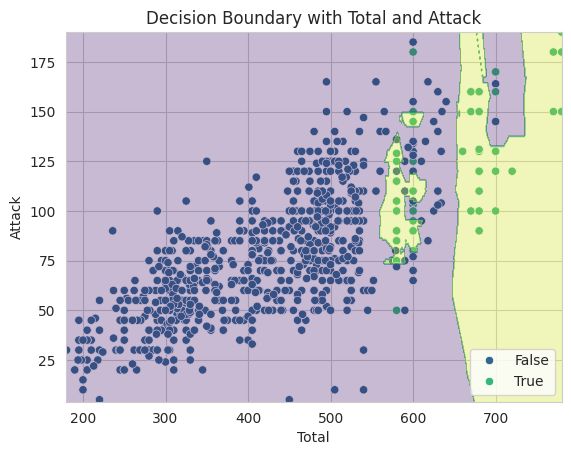

In [26]:
#@title הרץ על מנת לקבל גרף גבולות החלטה לפי הפרמטרים

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

#כאן לשנות את ערך הK ולנסות לראות איך גבולות ההחלטה משתנים בהתאם
knn_ = KNeighborsClassifier(n_neighbors=3)

target_dict = {k: v for v, k in enumerate(np.unique(df[classification_class]))}
y = np.array([target_dict[i] for i in df[classification_class]])
X = df[[feature1,feature2]]
knn_.fit(X, y)

xx, yy = np.meshgrid(np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 1),
                     np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 1))

Z = knn_.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
color_palette = sns.color_palette('husl', n_colors=len(df[classification_class].unique()))

ax=sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1],hue=y, palette='viridis')

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundary with ' +feature1 + ' and '+ feature2)
handles, labels  =  ax.get_legend_handles_labels()
plt.legend(handles,target_dict.keys( ), loc='lower right')
plt.show()


<div dir="rtl" align="center">

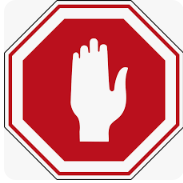
<br><br>

<div dir="rtl" align="center"><font size='6' color='#A31D1D'> <b>עצרו כאן!</b><br> המתינו להוראות המדריך.

<div align="center" dir="rtl">
 <hr color="#7E30E1" style="border: none; border-top: 2px solid; margin: 0;"/>
 <hr color="#7E30E1" style="border: none; border-top: 2px solid; margin: 0;"/>
 <div align="center" dir="rtl">
  <font color="#7E30E1" size="6">
   <b>
 חלק ב' - היכרות עם Scikit Learn
   </b>
  </font>
  <div align="center" dir="rtl">
   <hr color="#7E30E1" style="border: none; border-top: 2px solid; margin: 0;"/>
   <hr color="#7E30E1" style="border: none; border-top: 2px solid; margin: 0;"/>
  </div>
 </div>
</div>


<div dir="rtl">

**סעיף 9**

לפני שנתחיל, עליכם לסנן מהנתונים את כל הפוקימונים שאינם מסוג (Type 1) - אש, מים או דשא.<br>

In [27]:
#השלימו כאן קטע קוד
#------------
df = df[(df['Type 1']=='Rock') | (df['Type 1']=='Fire') | (df['Type 1']=='Water')]
#------------

<div dir="rtl"><font size=4>

**סעיף 2**

כעת נרצה לבנות מודל חיזוי מסוג knn באמצעות הספריה sklearn שהכרנו בשבוע שעבר.
<br>
נרצה לפצל את הנתונים לשני DataFrames נפרדים -
* להגדיר DataFrame בשם X, המכיל את הפיצ'רים.
* להגדיר DataFrame בשם y המכיל את התיוגים (labels) המתאימים ל-X.

לשם כך עליכם:
* לבחור את 6 הפיצ'רים המתאימים ביותר.
* להגדיר רשימות נפרדות המכילות את שמות העמודות אשר ישמשו ל-X ו-y.

In [28]:
# השלימו כאן את הפיצ'רים הרלוונטים
X = df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
y = df['Type 1']

feature_names = X.keys()
lables_names = y.unique()

<div dir="rtl"><font size=4>

**סעיף 3**

בצעו חלוקה לסט אימון וסט בדיקה כפי שלמדתם בשיעור הקודם.<br> תזכורת: חלוקה ביחס 20%-80%, באמצעות מתודה מהספריה sklearn.

In [29]:
#השלימו כאן קטע קוד
#------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 25)
#------------

<div dir="rtl"><font size=4>

**הריצו את קטע הקוד הבא**

שאלות למחשבה 🤔<br>
* איזה סט נתונים ישמש אותנו לחישוב מטריצת הבלבול? (מבחן/אימון)
* איזה K נבחר בקטע הקוד הנ"ל? האם תוכלו לחשוב על סיבה שבחרו דווקא בערך זה?

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

 <hr color="#007074" style="border: none; border-top: 2px solid; margin: 0;"/>
<div dir="rtl" align="center"><font size=4>
<br>
 במעבר חד, נחזור לחישוב מטריצת הבלבול.<br>
 עד כה ראינו מטריצה של 2 מימדים שנראתה כך:

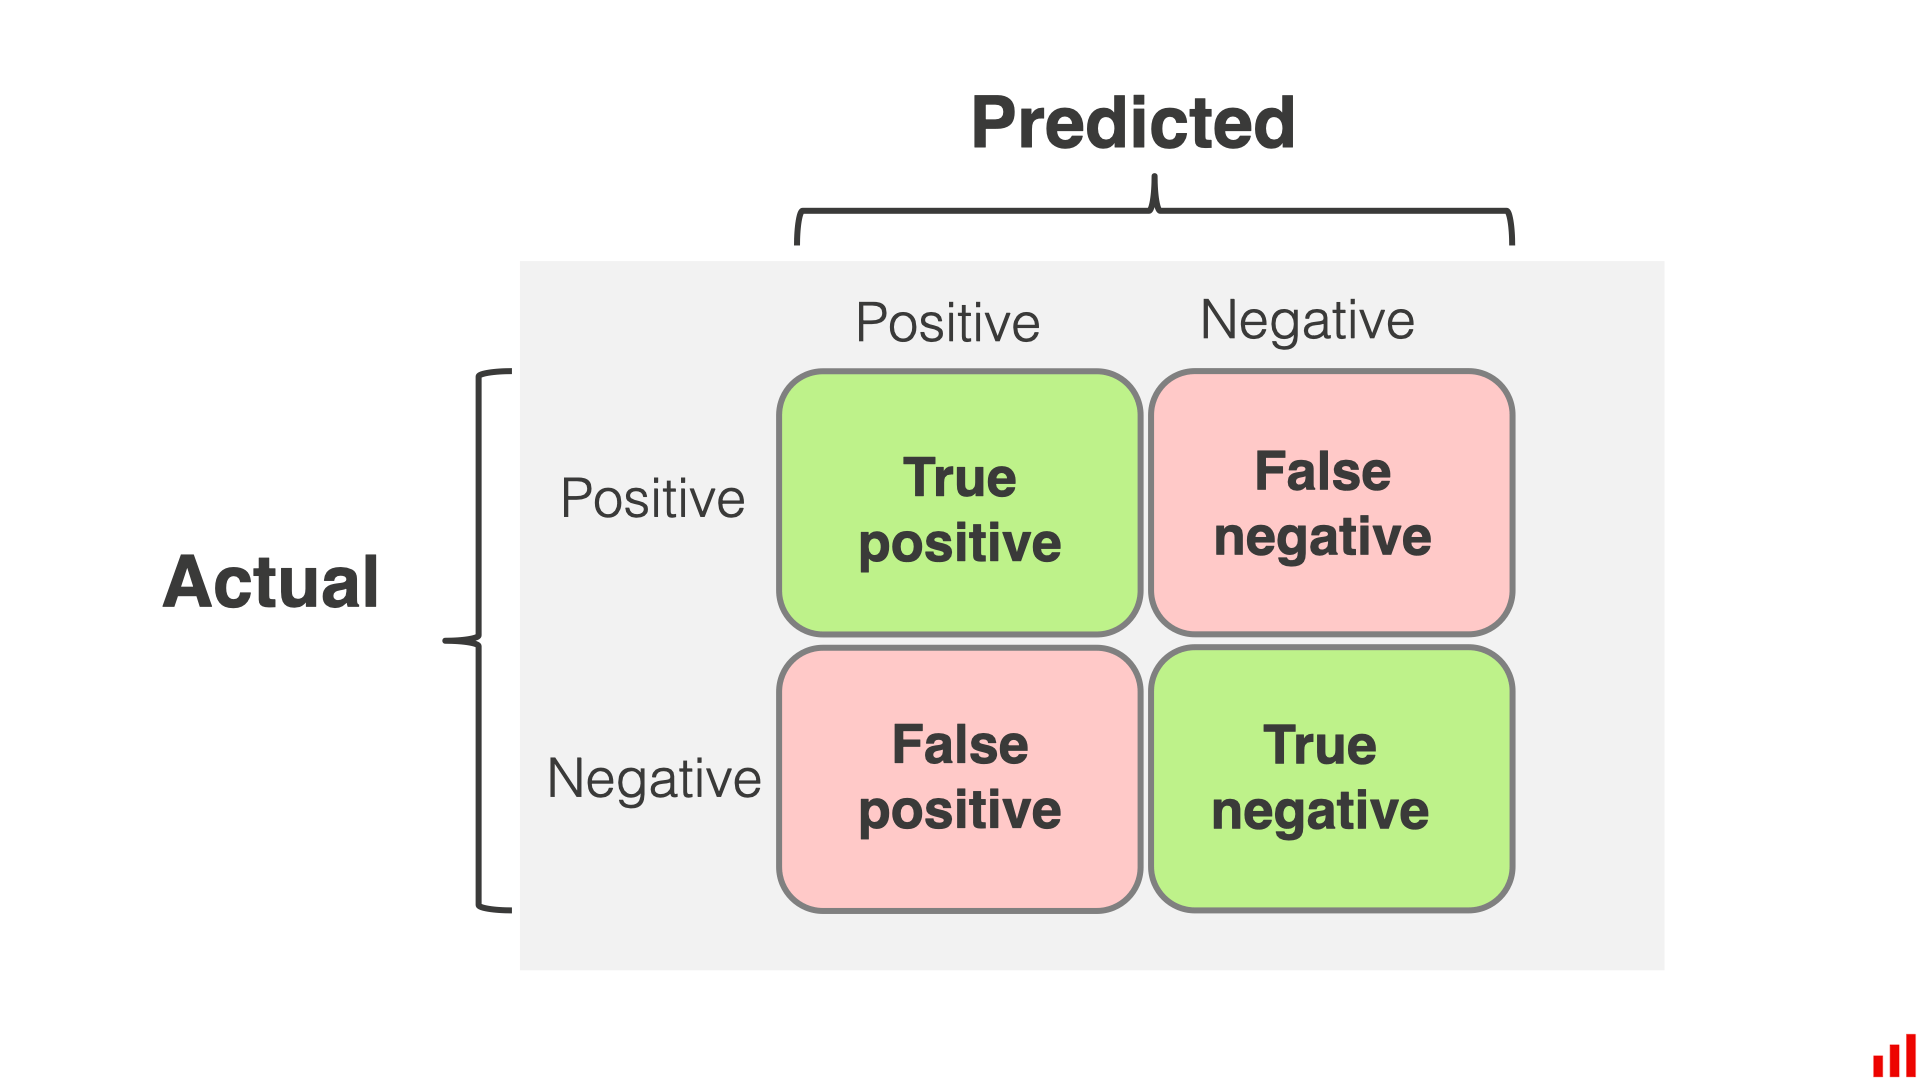

<div dir="rtl" align='center'><font size=4>
בשלב זה נתרגל כיצד נוכל לייצג את המטריצה באופן ויזואלי. השוני- הפעם נתעסק עם מטריצה בגודל 3X3, משום שיש לנו 3 מחלקות.

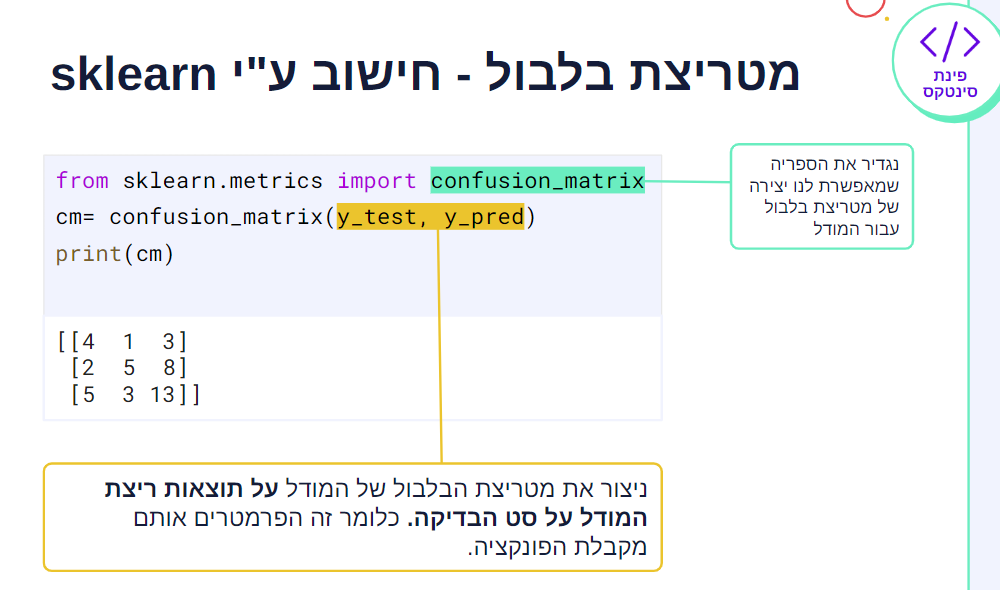

<CENTER>

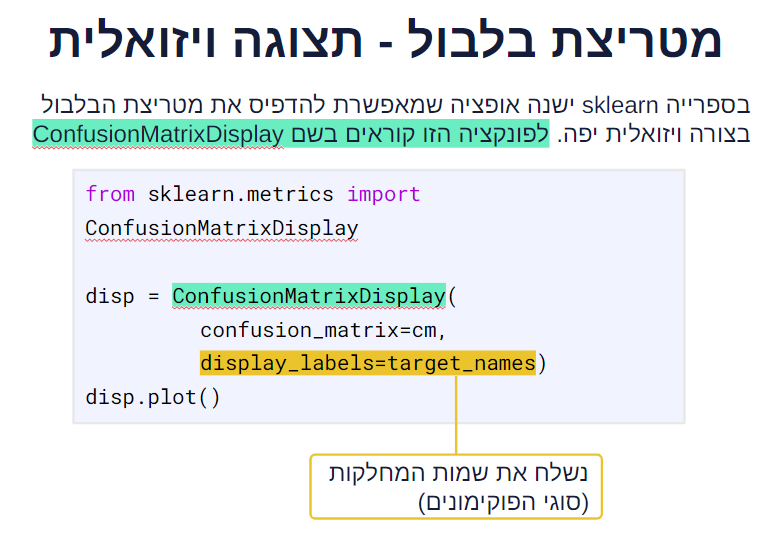

 <hr color="#007074" style="border: none; border-top: 2px solid; margin: 0;"/>

<div dir="rtl">

**סעיף 5**<br>
על סמך ההסבר, כתבו קטע קוד להדפסת מטריצת הבלבול המתאימה.

שאלה למחשבה 🤔<br>
מה מייצגים המשתנים y_test ו-y_pred?

In [31]:
# השלימו כאן קטע קוד
#------------
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)
#------------

[[ 4  1  5]
 [ 0  4  4]
 [ 5  4 15]]


<div dir="rtl">

<b>סעיף 6</b><br>
השלימו את קטע הקוד הבא על מנת להציג את מטריצת הבלבול באופן ויזואלי.

שאלה למחשבה 🤔<br>
האם אתם מרוצים מהמודל? איזה פרמטר ניתן לשנות ולבדוק את אופן השפעתו על המטריצה?

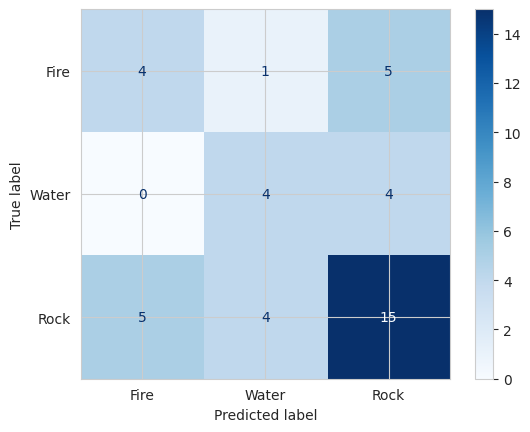

In [33]:
# השלימו כאן קטע קוד - 1
#------------
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lables_names)
disp.plot(cmap='Blues',ax=None, xticks_rotation='horizontal')
#------------


<div dir="rtl" align="center">

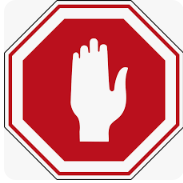
<br><br>

<div dir="rtl" align="center"><font size='6' color='#A31D1D'> <b>עצרו כאן!</b><br> המתינו להוראות המדריך.

<div align="center" dir="rtl">
 <hr color="#7E30E1" style="border: none; border-top: 2px solid; margin: 0;"/>
 <hr color="#7E30E1" style="border: none; border-top: 2px solid; margin: 0;"/>
 <div align="center" dir="rtl">
  <font color="#7E30E1" size="6">
   <b>
 חלק ג' - מדדי הערכה 🔄
   </b>
  </font>
  <div align="center" dir="rtl">
   <hr color="#7E30E1" style="border: none; border-top: 2px solid; margin: 0;"/>
   <hr color="#7E30E1" style="border: none; border-top: 2px solid; margin: 0;"/>
  </div>
 </div>
</div>


<div dir="rtl" align='right'><font size=4>

**Accuracy** <br>
נחשב את ערך ה-accuracy באמצעות הספריה sklearn

In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5476190476190477


<div dir="rtl"><font size=4>

**סעיף 1**

נרצה לשנות את ערך הפיטצ'ר <b>מהירות.</b> <br>
לצורך כך, עליכם לממש פונקציה חדשה המחשבת את המהירות לפי הכללים הבאים:
<br>

*   סוג פוקימון דשא - הוסיפו 6.
*   סוג פוקימון מים - הוסיפו 5, הכפילו ב-1.2. עגלו את התוצאה.
*   סוג פוקימון אש - הוסיפו 2.5, והכפילו ב-1.6. עגלו את התוצאה.

לבסוף, הגדירו DataFrame חדש וצרו עמודה חדשה בשם new_speed המייצגת את המהירות החדשה את הפונקצית שכתבתם.

In [35]:
# השלימו כאן קטע קוד
#------------
def calculate_speed(row):
    if row['Type 1'] == 'Water'  :
        return round((row['Speed'] + 5) * 1.2)
    elif row['Type 1'] == 'Fire' :
        return round((row['Speed'] + 2.5) * 1.6)
    else:
        return row['Speed'] + 6

new_df = df.assign(Speed=lambda x: x.apply(calculate_speed, axis=1))
#------------

<div dir="rtl"><font size=4>

**סעיף 2** <br>
חשבו את ערך ה-Accuracy לאחר שימוש בעמודה החדשה.<br><br>
שאלה למחשבה 🤔<br>
האם הדיוק השתפר? מה עשויה להיות הסיבה לכך?

In [36]:
X = new_df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
y = new_df['Type 1']

feature_names = X.keys()
lables_names = y.unique()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 25)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6190476190476191

<div dir="rtl" align='right'><font size=4>

**סעיף 4 - מציאת ערך K אופטימלי - Optimal K** <br>



<div dir="rtl"><font size=4>

נציג שיטה על מנת לאפטם (לשפר) את ערך ה-K.
 <br>

*   ניצור רשימה עבור כל אחד מערכי ה-K השונים אותם נרצה לבחור.
*   לכל אחד מערכי ה-K:
    * נריץ את מודל ה-KNN על סט המבחן ונחשב את השגיאה המתקבלת.
    * נשמור את התוצאה במילון (המפתח הוא ערך ה-K, והערך המתאים לו הוא השגיאה)
* לבסוף, ניצור גרף המציג את השגיאה לכל ערך - ציר ה-x ייצג את ערכי ה-K השונים שבחנתם, ציר ה-K מציג את ערך ה-Accuracy שהתקבל עבורו.
עבור כל ערך של K, נחשב את השגיאה עבור סט הבדיקה
*  נבחר את ערך ה-K בו השגיאה שהתקבלה היא הנמוכה ביותר.<br><br>
 בסיום הדפיסו את הגרף המייצג את הדיוק כתלות ב-k.<br>

 שאלה למחשבה 🤔<br><br>
מה יקרה עבור ערכי K קיצוניים (גדולים/קטנים מאוד)?

In [37]:
k_vals = range(1,31)
results = []
for K in k_vals:
  model = KNeighborsClassifier(K)
  model.fit(X_train, y_train)
  pred_labels = model.predict(X_test)
  results.append(accuracy_score(y_test, pred_labels))

<Axes: >

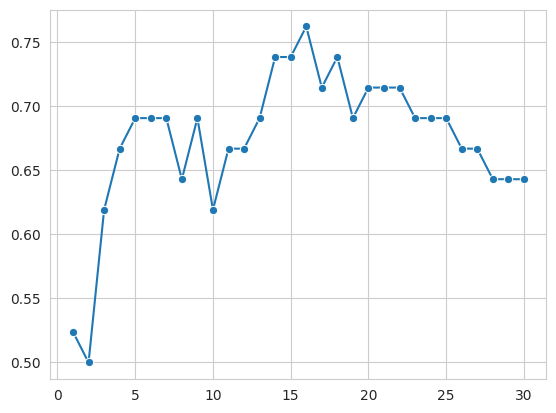

In [38]:
sns.lineplot(x=k_vals, y=results, marker='o')

<div dir="rtl">
<font color= #7E30E1 size="7"><b>
<center>
כל הכבוד! 👏 <br>סיימתם את מטלת הכיתה! 🎉 <br>

<div dir="rtl" align="center">

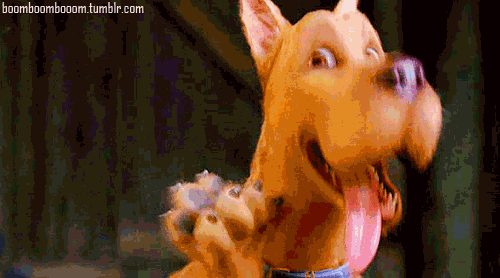